# Univariate Modelling

In [1]:
import os
import joblib
import pandas as pd

stored_models = [file for file in os.listdir() if file.endswith('.model.pkl')]
stored_models

['XGBRegressor.model.pkl']

In [2]:
from sklearn.ensemble import VotingRegressor

estimators = []
for model_file in stored_models:
    print(f'Loading {model_file}')
    model = joblib.load(model_file)
    estimators.append((
        model_file.replace('.model.pkl', ''),
        model
    ))

estimators

Loading XGBRegressor.model.pkl


[('XGBRegressor',
  XGBRegressor(alpha=0.001, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.85, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=3, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=0.1, learning_rate=0.03,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=2, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=234, n_jobs=None, ...))]

In [3]:
# Load, preprocess and standardize the train data 
from pipeline_shapped_xgb import pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = pipeline.fit_transform(train_data)

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

ensemble = VotingRegressor(estimators=estimators, verbose=True)
ensemble.fit(X=X_train, y=y_train)
ensemble.score(X=X_train, y=y_train)

[Voting] ............. (1 of 1) Processing XGBRegressor, total=  13.9s


0.6074224656392795

# Prepare test results

In [4]:
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')

In [5]:
## Load the test data
test_data = pd.read_csv(test_file, index_col=0)
test_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,06:45:00,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8460,p01,11:25:00,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,Walk,Walk
p01_8461,p01,14:45:00,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8462,p01,04:30:00,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p01_8463,p01,04:20:00,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from pipeline_shapped_xgb import pipeline

test_data = pipeline.fit_transform(test_data)
test_data.head()

,bg-5:55,bg-5:50,bg-5:30,bg-5:10,bg-5:00,bg-4:45,bg-4:20,bg-4:00,bg-3:55,bg-3:45,...,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.108533,0.107304,0.428776,0.434532,0.576337,1.067296,1.957032,1.801464,1.742270,1.599203,...,-0.184486,-0.155831,-0.163774,-0.151403,-0.167945,0,0,1,0,-0.460260
p01_8460,0.317270,0.316490,0.176649,0.005366,-0.159542,-0.341861,-0.329291,-0.517556,-0.521606,-0.521536,...,3.164323,-0.141697,-0.142674,-0.135734,-0.150540,0,0,0,0,2.172686
p01_8461,-0.994788,-0.998389,-1.033563,-1.108422,-1.117718,-1.138341,-1.205547,-1.330719,-1.296355,-1.215048,...,-0.175271,-0.148764,-0.153224,-0.143569,-0.159242,0,0,0,0,-0.460260
p01_8462,-1.620997,-1.625945,-1.406712,-1.384314,-1.508654,-1.587637,-1.366697,-1.350797,-1.437219,-1.586931,...,-0.166057,-0.141697,-0.142674,-0.135734,-0.150540,0,0,0,1,-0.460260
p01_8463,-0.159842,-0.161648,0.358181,1.098717,1.220231,1.220466,0.859194,0.988301,0.957459,0.895641,...,-0.230778,-0.191335,-0.216779,-0.190766,-0.211668,0,0,0,1,-0.460260


In [7]:
# Predict the bg+1:00 values
test_data['bg+1:00'] = ensemble.predict(test_data)
test_data.head()

,bg-5:55,bg-5:50,bg-5:30,bg-5:10,bg-5:00,bg-4:45,bg-4:20,bg-4:00,bg-3:55,bg-3:45,...,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_8459,0.108533,0.107304,0.428776,0.434532,0.576337,1.067296,1.957032,1.801464,1.742270,1.599203,...,-0.155831,-0.163774,-0.151403,-0.167945,0,0,1,0,-0.460260,8.639879
p01_8460,0.317270,0.316490,0.176649,0.005366,-0.159542,-0.341861,-0.329291,-0.517556,-0.521606,-0.521536,...,-0.141697,-0.142674,-0.135734,-0.150540,0,0,0,0,2.172686,6.293937
p01_8461,-0.994788,-0.998389,-1.033563,-1.108422,-1.117718,-1.138341,-1.205547,-1.330719,-1.296355,-1.215048,...,-0.148764,-0.153224,-0.143569,-0.159242,0,0,0,0,-0.460260,7.145176
p01_8462,-1.620997,-1.625945,-1.406712,-1.384314,-1.508654,-1.587637,-1.366697,-1.350797,-1.437219,-1.586931,...,-0.141697,-0.142674,-0.135734,-0.150540,0,0,0,1,-0.460260,8.748154
p01_8463,-0.159842,-0.161648,0.358181,1.098717,1.220231,1.220466,0.859194,0.988301,0.957459,0.895641,...,-0.191335,-0.216779,-0.190766,-0.211668,0,0,0,1,-0.460260,6.025670


## Prepare the submission file

In [8]:
submission = pd.DataFrame(test_data['bg+1:00'])
submission

,bg+1:00
id,
p01_8459,8.639879
p01_8460,6.293937
p01_8461,7.145176
p01_8462,8.748154
p01_8463,6.025670
...,...
p24_256,6.410132
p24_257,9.237190
p24_258,6.321971


### Save the submission file

In [9]:
submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')

## Evaluate the model

RMSE: 1.8774182840801221
R2: 0.6074224656392795


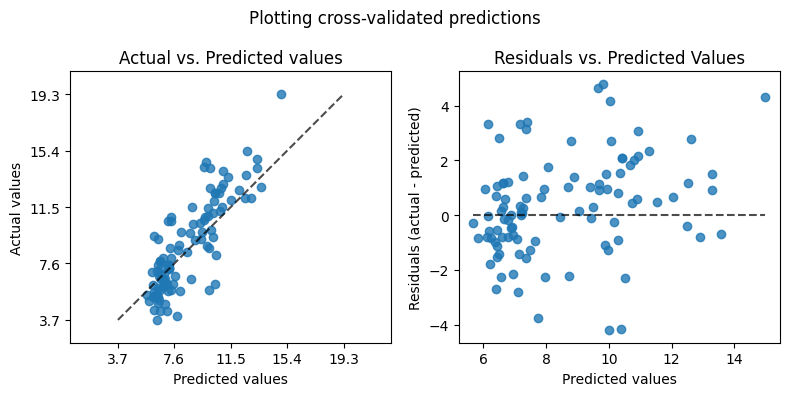

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_pred = ensemble.predict(X=X_train)
print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();